In [1]:
import logging
import hydra
import pandas as pd

from collections import defaultdict
from tqdm import tqdm 

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.patches import Ellipse

from erc import drawing_ellipse, split_df_by_gender

In [2]:

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

with hydra.initialize(version_base=None, config_path="./config"):
    cfg = hydra.compose(config_name="config", overrides={"dataset.generate_csv=True"})
dataset = hydra.utils.instantiate(cfg.dataset)


Processing ECG / EDA / Label:   0%|          | 0/20 [00:00<?, ?it/s]

## Emotion EDA

In [3]:
# Emotion dataframe 
eva_dict = defaultdict(list)
for sample in tqdm(dataset):
    for key_ in ['emotion','valence','arousal','gender']:
        if (sample.get(key_) == None):
            pass
        else:    
            eva_dict[key_].append(sample.get(key_).item())
            
df = pd.DataFrame(eva_dict)
df = df[df['emotion']!=0]



 12%|█▏        | 1202/10128 [00:02<00:15, 573.65it/s]

Error occurs ->  data/KEMDy19/wav/Session03/Sess03_script04


 26%|██▌       | 2592/10128 [00:04<00:13, 577.52it/s]

Error occurs ->  data/KEMDy19/wav/Session06/Sess06_script02
Error occurs ->  data/KEMDy19/wav/Session06/Sess06_script02


 30%|██▉       | 2999/10128 [00:05<00:12, 569.84it/s]

Error occurs ->  data/KEMDy19/wav/Session07/Sess07_script02
Error occurs ->  data/KEMDy19/wav/Session07/Sess07_script02


100%|██████████| 10128/10128 [00:17<00:00, 566.07it/s]


In [4]:
# 성별 
print('Male: {:04d}, Female: {:04d}'.format(*df['gender'].value_counts().values))

# Valence min-max 
for key in ['valence','arousal']:
    print(f'{key}: \n\tMin: {min(df[key]):.2f}\n\tMax: {max(df[key]):.2f}')



Male: 4843, Female: 4639
valence: 
	Min: 1.00
	Max: 5.00
arousal: 
	Min: 1.40
	Max: 5.00


In [5]:
total_dict=split_df_by_gender(df)
male_dict, female_dict = split_df_by_gender(df, total=False)


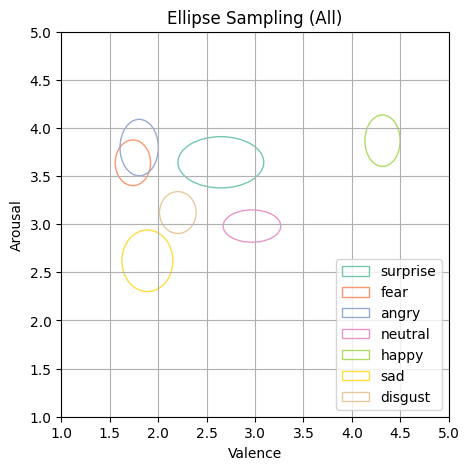

In [6]:
drawing_ellipse(total_dict)

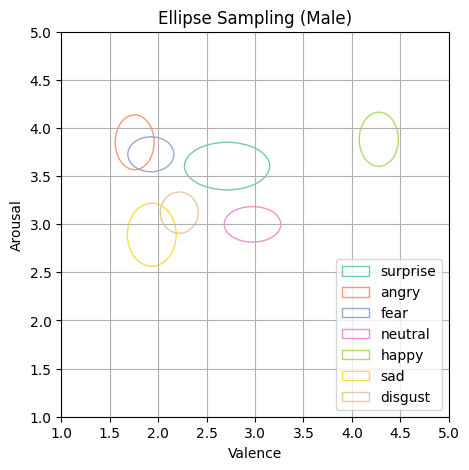

In [7]:
drawing_ellipse(male_dict, title='Ellipse Sampling (Male)')


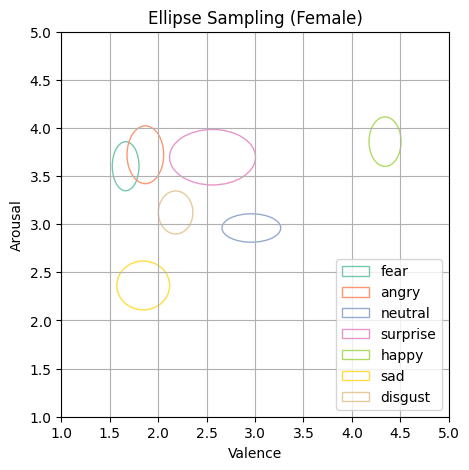

In [8]:
drawing_ellipse(female_dict, title='Ellipse Sampling (Female)')

/tmp/ipykernel_80798/1679219818.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(['surprise', 'fear', 'angry', 'neutral', 'happy', 'sad', 'disgust'])


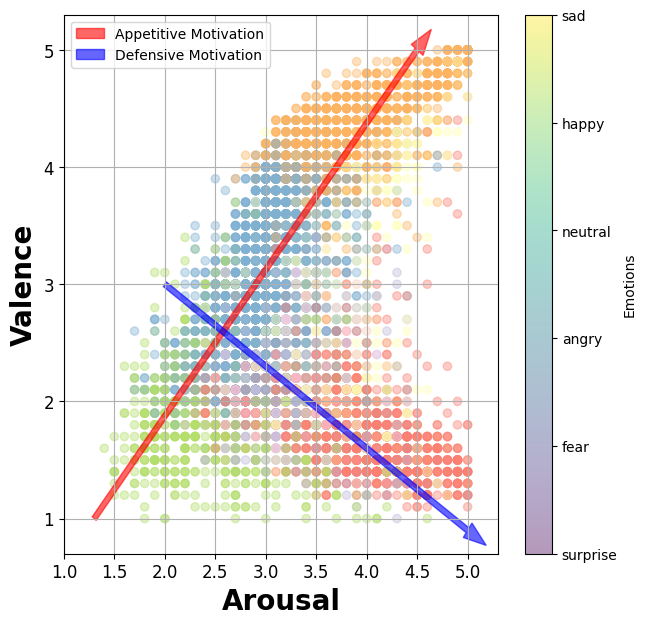

In [9]:

# refer : IAPS affective rating


color_palette   = mpl.colormaps['viridis']
# cmap = cm.bwr ## 또는 plt.cm.get_cmap('bwr')
vmax = 6
vmin = 0
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
colormapping = cm.ScalarMappable(norm=norm, cmap=color_palette)


sns_palette = sns.color_palette('Set3')

label_fsize = 20
ticks_fsize = 12
legend_size = 10

plt.figure(figsize=(7,7))
plt.scatter(df['arousal'], df['valence'],
            color=[sns_palette[int(i)] for i in df['emotion']],
            # cmap = colormapping,
            alpha=0.4)


plt.arrow(1.3, 1, 3.2,4, width = 0.05 ,label='Appetitive Motivation', alpha=0.6,color='red')
plt.arrow(2, 3,   3, -2.1,width = 0.05 ,label='Defensive Motivation', alpha=0.6,color='blue')




plt.xlabel('Arousal', fontweight='bold', fontsize=label_fsize)
plt.ylabel('Valence', fontweight='bold', fontsize=label_fsize)
plt.xlim(1,5.3)
plt.ylim(0.7,5.3)
plt.grid(True)
plt.yticks(fontsize=ticks_fsize, fontweight='normal')
plt.xticks(fontsize=ticks_fsize,
            fontweight='normal',
            )
plt.legend(loc='upper left',fontsize=legend_size,)

cb = plt.colorbar(label='Emotions', ax=plt.gca())
# cb.set_ticks([0,1,2,3,4,5,6])
cb.set_ticklabels(['surprise', 'fear', 'angry', 'neutral', 'happy', 'sad', 'disgust'])
# plt.legend(,
            #    loc='upper left',
            #    fontsize=legend_size,
            #    )
plt.show()





In [ ]:
# refer : IAPS affective rating

color_palette = sns.color_palette("Paired")
label_fsize = 20
ticks_fsize = 12
legend_size = 10

plt.figure(figsize=(7,7))


plt.scatter(df['arousal'], df['valence'],
            # color=[f'C{int(i)}' for i in df['emotion']],
            color=[color_palette[int(i)] for i in df['emotion']],
            # edgecolors='black',linewidth=1,
            # label=df['emotion'],
            # label=[f'{emotion_r.get(i)}' for i in df['emotion']],
            alpha=0.4)


# plt.plot([1.3,4.7],[1,5.2],label='Appetitive Motivation', alpha=0.9,color='red')
plt.arrow(1.3, 1, 3.2,4, width = 0.05 ,label='Appetitive Motivation', alpha=0.6,color='red')
# plt.plot([2,5.2],[3,1],label='Appetitive Motivation', alpha=0.7,color='green')
plt.arrow(2, 3,   3, -2.1,width = 0.05 ,label='Defensive Motivation', alpha=0.6,color='green')
# plt.plot(x,z,label='z=3x')
# plt.legend(bbox_to_anchor=(1,1))

# [ 출처: https://seong6496.tistory.com/ ]



plt.xlabel('Arousal', fontweight='bold', fontsize=label_fsize)
plt.ylabel('Valence', fontweight='bold', fontsize=label_fsize)
plt.xlim(1,5.3)
plt.ylim(0.7,5.3)
plt.grid(True)
plt.yticks(fontsize=ticks_fsize, fontweight='normal')
plt.xticks(fontsize=ticks_fsize,
            fontweight='normal',
            )
plt.legend(loc='upper left',fontsize=legend_size,)



from matplotlib.colors import ListedColormap
# cmap = 
# cmap = ListedColormap(sns.color_palette("Paired"))
plt.colorbar(label='Emotions', ax=plt.gca())

# cb = plt.colorbar(label='Emotions', ax=plt.gca())

# cb.set_ticks([0,1,2,3,4,5,6])
# cb.set_ticklabels(, ,['surprise', 'fear', 'angry', 'neutral', 'happy', 'sad', 'disgust'])
# plt.legend(,
            #    loc='upper left',
            #    fontsize=legend_size,
            #    )
plt.show()
